<a href="https://colab.research.google.com/github/josephcxhxa/chest_xray_cnn_autoencoder_noise_reduction/blob/master/CNN_Autoencoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Image Enhacement - Convolutional Neural Networks Autoencoders for Image Noise Reduction

Coded by: José Carlos Luna Alcántara

Paper Source: <br>
<i>`L. Gondara, "Medical image denoising using convolutional
denoising autoencoders", Burnaby, Canda,  Simon Fraser University, 2016.`</i>

Dataset source: <br>
<n>Chest Xray Masks and Labels</n> - 
Pulmonary Chest X-Ray Defect Detection <br>
<u><a href="https://www.kaggle.com/nikhilpandey360/chest-xray-masks-and-labels"> https://www.kaggle.com/nikhilpandey360/chest-xray-masks-and-labels </a> </u>

Other sources: <br>
Convolutional Autoencoders for Image Noise Reduction: <u><a href="https://towardsdatascience.com/convolutional-autoencoders-for-image-noise-reduction-32fce9fc1763"> https://towardsdatascience.com/convolutional-autoencoders-for-image-noise-reduction-32fce9fc1763</a></u>

## 1 . - Import Libraries

In [0]:
%tensorflow_version 2.x

import numpy as np
from matplotlib import pyplot as plt

import os
import zipfile

import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D

%matplotlib inline

TensorFlow 2.x selected.


## 2 . - Dataset

### 2.1. - Obtaining dataset

The chest x-ray dataset contains 800 pictures for training and 96 pictures for testing.

#### 2.1.1. - Uploading file locally

Let's download the dataset from the following URL: <a href="https://drive.google.com/open?id=18NcurqXCLzTlf8PWG7VuSJIZd6DnWd49"> `https://drive.google.com/open?id=18NcurqXCLzTlf8PWG7VuSJIZd6DnWd49`</a> <br> 
`[very slow, NOT RECOMMENDED]`

The .zip file will be uploaded in `/content`.

In [0]:
from google.colab import files

uploaded = files.upload()

#### 2.1.2. - Getting file from google colab

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### 2.2. - Unziping the data

The following python code will use the zipfile library allowing you to unzip the data. 

In [0]:
# Directory where your .zip is located in your Drive
local_zip = '/content/drive/My Drive/Imagenología/Imágenes de RX/chest_rx_dataset.zip'

zip_ref = zipfile.ZipFile(local_zip, 'r')

zip_ref.extractall('/tmp')
zip_ref.close()

The contents of the .zip are extracted to the base directory `/tmp`, which contain images for `training` and `testing`.

## 3 . - Data Preprocessing

From the extracted files, load the input and output images for training and testing.

In [0]:
train = np.load('/tmp/train_generator.npy')
test = np.load('/tmp/test_generator.npy')

print("shape[0]: train - test, shape[1]: m-examples, shape[2:3]: Image Resolution, shape[4]: Color chanel")
print('Train shape:', train.shape)
print('Test shape:', test.shape)

X_train = train[0]; Y_train = train[1]
X_test = test[0]; Y_test = test[1]

shape[0]: train - test, shape[1]: m-examples, shape[2:3]: Image Resolution, shape[4]: Color chanel
Train shape: (2, 800, 480, 480, 3)
Test shape: (2, 96, 480, 480, 3)


## 4 . - Plotting the data

### 4.1. - Custom plot function for easy displaying.

In [0]:
def plot(x, ini=0):
    plt.figure(figsize=(20,2))
    for i in range(ini, ini+10):
        plt.subplot(1,10,i-ini+1)
        plt.imshow(x[i])
        plt.xticks([])
        plt.yticks([])
        
    plt.show()
    return

### 4.2. - Input/output image displaying

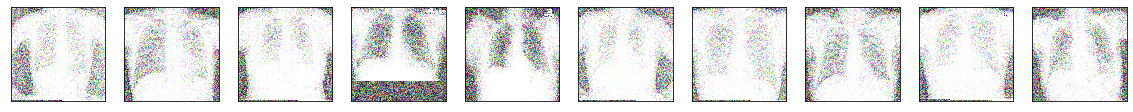

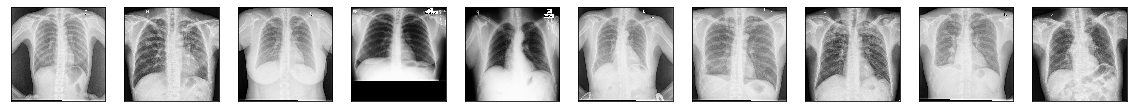

In [0]:
plot(X_train, ini=100)
plot(Y_train, ini=100)

## 5 . - Building the Convolutional Neural Network Autoencoder

### 5.1. - Build Model

In [0]:
tf.keras.backend.clear_session()

# The encoding process
input_img = Input(shape=X_train.shape[1:4])  

############
# Encoding #
############

# Conv1 #
x = Conv2D(filters = 16, kernel_size = (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D(pool_size = (2, 2), padding='same')(x)

# Conv2 #
x = Conv2D(filters = 8, kernel_size = (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D(pool_size = (2, 2), padding='same')(x) 

# Conv 3 #
x = Conv2D(filters = 8, kernel_size = (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D(pool_size = (2, 2), padding='same')(x)


############
# Decoding #
############

# DeConv1
x = Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)

# DeConv2
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)

# Deconv3
x = Conv2D(16, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)


# Declare the model
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

autoencoder.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 480, 480, 3)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 480, 480, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 240, 240, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 240, 240, 8)       1160      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 120, 120, 8)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 120, 120, 8)       584       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 60, 60, 8)         0     

### 5.2. - Train Model

In [0]:
history = autoencoder.fit(X_train, Y_train,
                epochs=100,
                batch_size=100,
                validation_split=0.2,                
               )

Train on 640 samples, validate on 160 samples
Epoch 1/100
640/640 [==============================] - 28s 43ms/sample - loss: 0.6907 - val_loss: 0.6847
Epoch 2/100
640/640 [==============================] - 11s 17ms/sample - loss: 0.6753 - val_loss: 0.6529
Epoch 3/100
640/640 [==============================] - 11s 17ms/sample - loss: 0.6238 - val_loss: 0.5715
Epoch 4/100
640/640 [==============================] - 11s 17ms/sample - loss: 0.5505 - val_loss: 0.5472
Epoch 5/100
640/640 [==============================] - 11s 17ms/sample - loss: 0.5350 - val_loss: 0.5286
Epoch 6/100
640/640 [==============================] - 11s 17ms/sample - loss: 0.5254 - val_loss: 0.5249
Epoch 7/100
640/640 [==============================] - 11s 18ms/sample - loss: 0.5211 - val_loss: 0.5208
Epoch 8/100
640/640 [==============================] - 11s 18ms/sample - loss: 0.5182 - val_loss: 0.5188
Epoch 9/100
640/640 [==============================] - 11s 17ms/sample - loss: 0.5165 - val_loss: 0.5172
Epoch 10/

### 5.3. - Model Loss

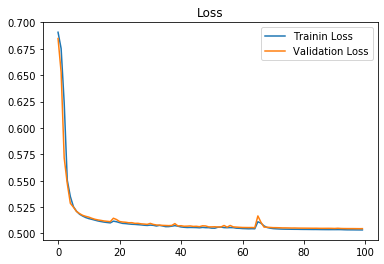

In [0]:
#-----------------------------------------------------------
# Retrieve a list of list results on training and validation data
# sets for each training epoch
#-----------------------------------------------------------
epochs   = range(len(history.history['loss'])) # Get number of epochs
#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, history.history['loss'], label='Trainin Loss')
plt.plot(epochs, history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title ('Loss')
plt.show()

## 6 . - Predicting New Cases

### 6.1. - Predict denoised images

In [0]:
preds = autoencoder.predict(X_test)
print("The shape of the predicted images is:", preds.shape)

The shape of the predicted images is: (96, 480, 480, 3)


### 6.2. - Show Model Results

Original test images


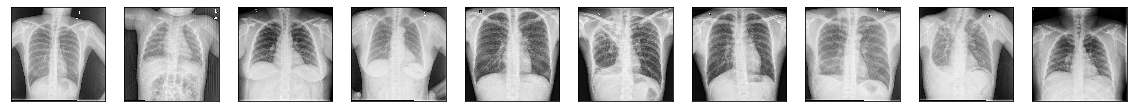

Noised test images


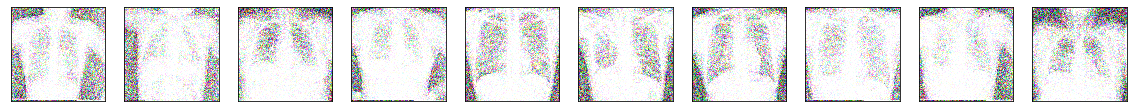

Autoencoder prediction


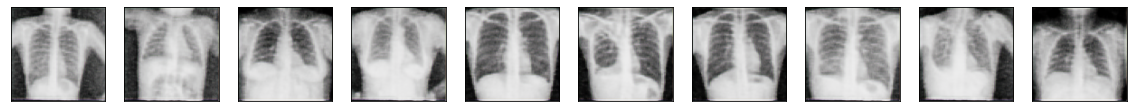

In [0]:
ini=56

print("Original test images")
plot(Y_test, ini)
print("Noised test images")
plot(X_test, ini)
print("Autoencoder prediction")
plot(preds, ini)

## 7 . - Save Keras Model

In [0]:
autoencoder.save('autoencoder.h5')